#Detección de tablas

###Se realiza la importación de librerías necesarias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files 
import glob
from google.colab import drive

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import pandas as pd

###Instalamos Layout Parser


Layout parser es una caja de herramientas para análisis de documentos, utiliza Deep Learning para realizar detección de la estructura de un documento. Esto lo hace a través de Detectron2.

In [ ]:
!pip install -U layoutparser

     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 636 kB 33.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


###Instalamos detectron2

Detectron2 es un sistema de software de Facebook AI Research que implementa algoritmos de detección de objetos de última generación.
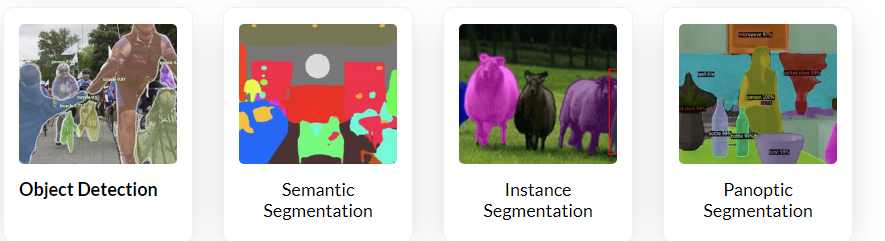

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-py32c10l/detectron2_fadb14eecce54a40ab361b958fd62e77
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-py32c10l/detectron2_fadb14eecce54a40ab361b958fd62e77
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.1 MB/s 
     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 39.6 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5161235 sha256=6e937909d81b018d3a055c212f785f89547b51b0d37840b0835550d2012fccfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-zi8f1crb/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58543 sha256=dc3cb97bb73150223adb18ed52296b4d4286f83720459638a6bb38751

In [ ]:
!pip install layoutparser[ocr]

     |████████████████████████████████| 435 kB 5.0 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=3dd580be4842a65ea9017a62153e01e556c5256bd756813e1c3bc5f2ef34191a
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
import layoutparser as lp


###Config path nos permite elegir el modelo, label define las clases a encontrar.

Faster R-CNN.

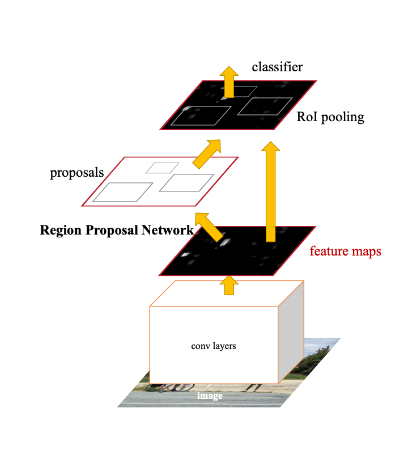

Faster R-CNN es un modelo de detección de objetos que mejora fast R-CNN al utilizar una red de propuesta de región (RPN) con el modelo CNN. El RPN comparte características convolucionales de imagen completa con la red de detección, lo que permite propuestas de región casi gratuitas. Es una red totalmente convolucional que predice simultáneamente los límites de los objetos y las puntuaciones de objetividad en cada posición. El RPN está entrenado de extremo a extremo para generar propuestas de región de alta calidad, que son utilizadas por Fast R-CNN para la detección. RPN y Fast R-CNN se fusionan en una sola red compartiendo sus características convolucionales: el componente RPN le dice a la red unificada dónde buscar.

In [ ]:
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_50_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )


config.yaml?dl=1: 8.19kB [00:00, 9.08kB/s]
model_final.pth?dl=1: 330MB [00:06, 49.5MB/s]                           


###Cargamos el directorio y creamos el csv

In [ ]:
path="/content/drive/MyDrive/JusticIA/Expedientes"

In [ ]:
lista=os.listdir(path)

In [ ]:
RETO1CSV=pd.DataFrame(columns=['filename','width','height','class','xmin','ymin','xmax','ymax'])

###Pasamos el modelo a todas las imágenes del directorio

In [ ]:
for i in lista:
  imagen = cv2.imread(path+"/"+i)
  w,h,_=imagen.shape
  layout = model.detect(imagen)
  print(i)
  if layout._blocks==[]:
    pass
  else:
    for j in range(len(layout._blocks)):
      RETO1CSV.loc[len(RETO1CSV.index)]=[i,w,h,"Table", layout[j].block.x_1 , layout[j].block.y_1 , layout[j].block.x_2 , layout[j].block.y_2]
    print("------>"+i)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-008.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-266.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-262.jpg
AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-002.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-129.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-242.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-270.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-170.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-286.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-341.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-210.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-155.jpg
------>AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-155.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-119.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-338.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-347.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-091.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-150.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-199.jpg
AGN_DFS_C.18_1_de_2_Cabr

In [ ]:
imagen = cv2.imread(path+"/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002.jpg")

In [ ]:
layout = model.detect(imagen)

###Cargamos una imagen de prueba

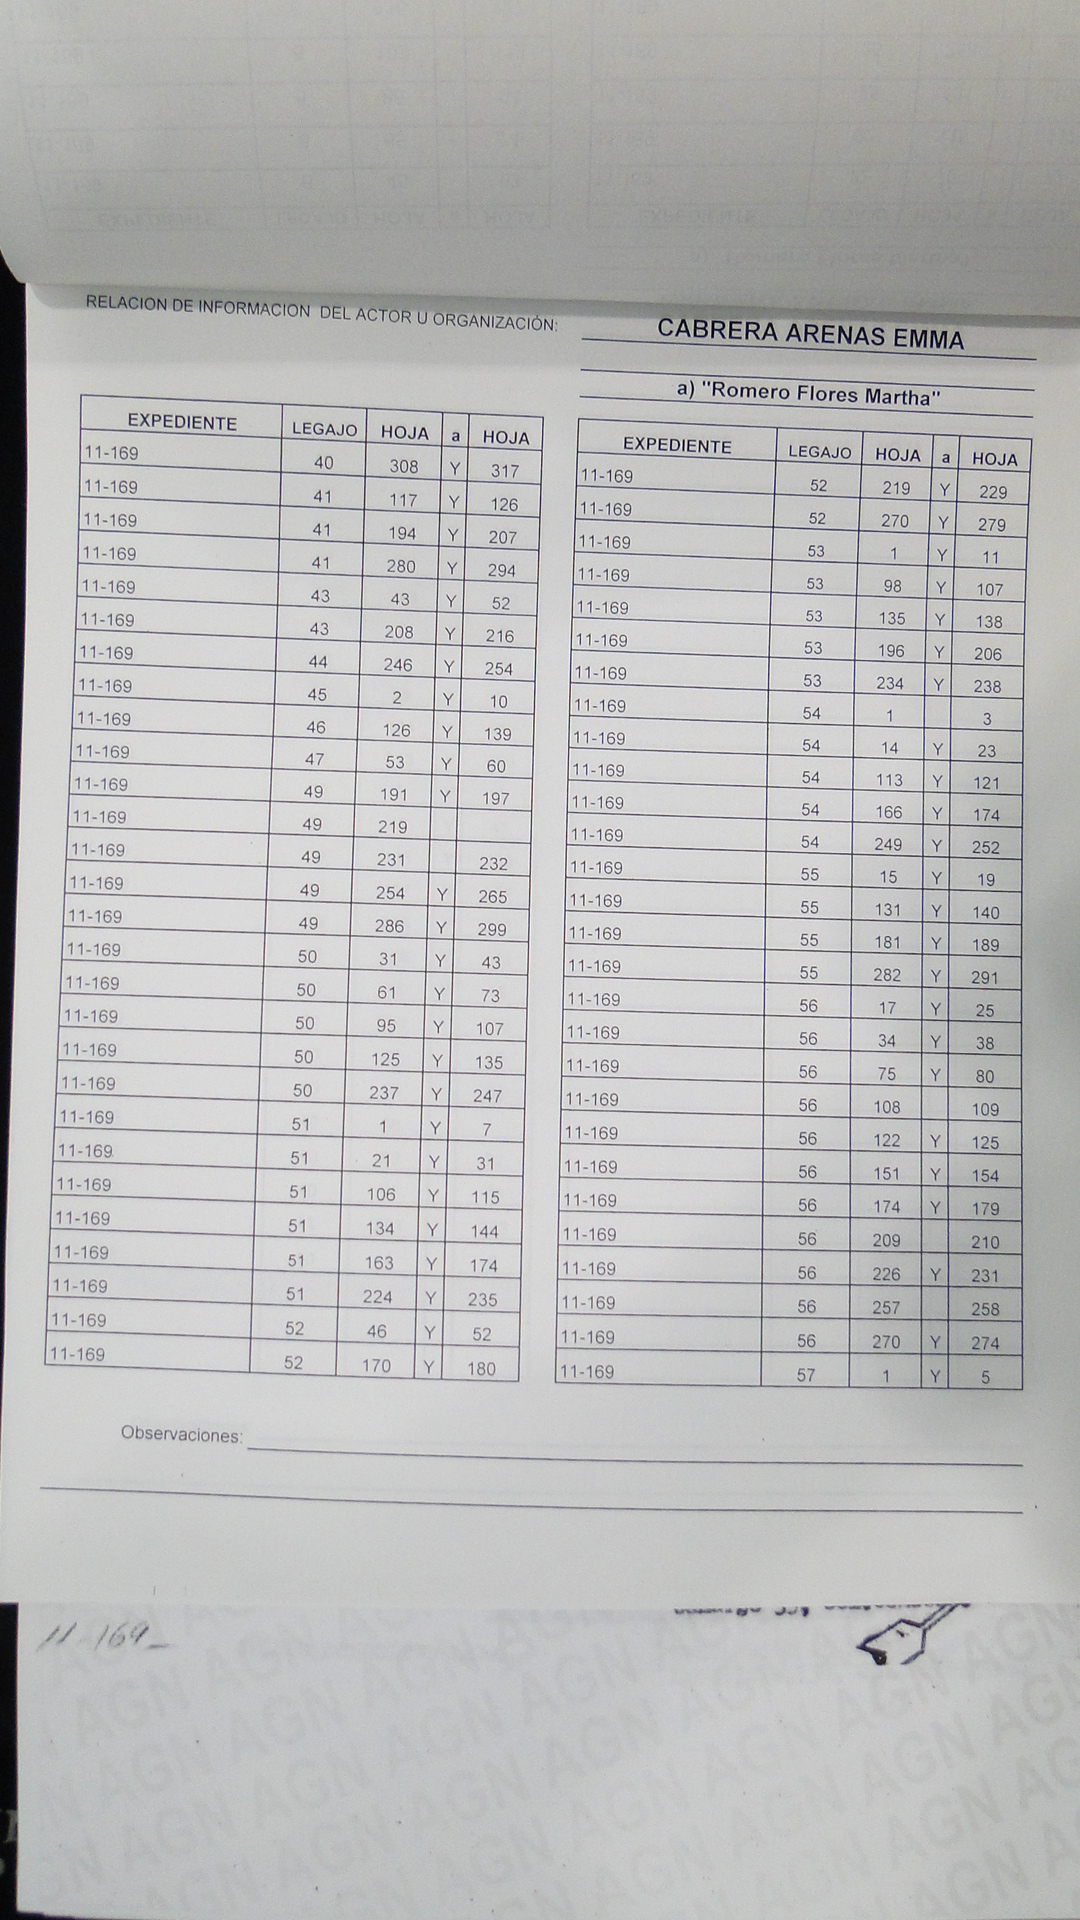

In [ ]:
cv2_imshow(imagen)

#Dibujamos los rectángulos para las tablas encontradas

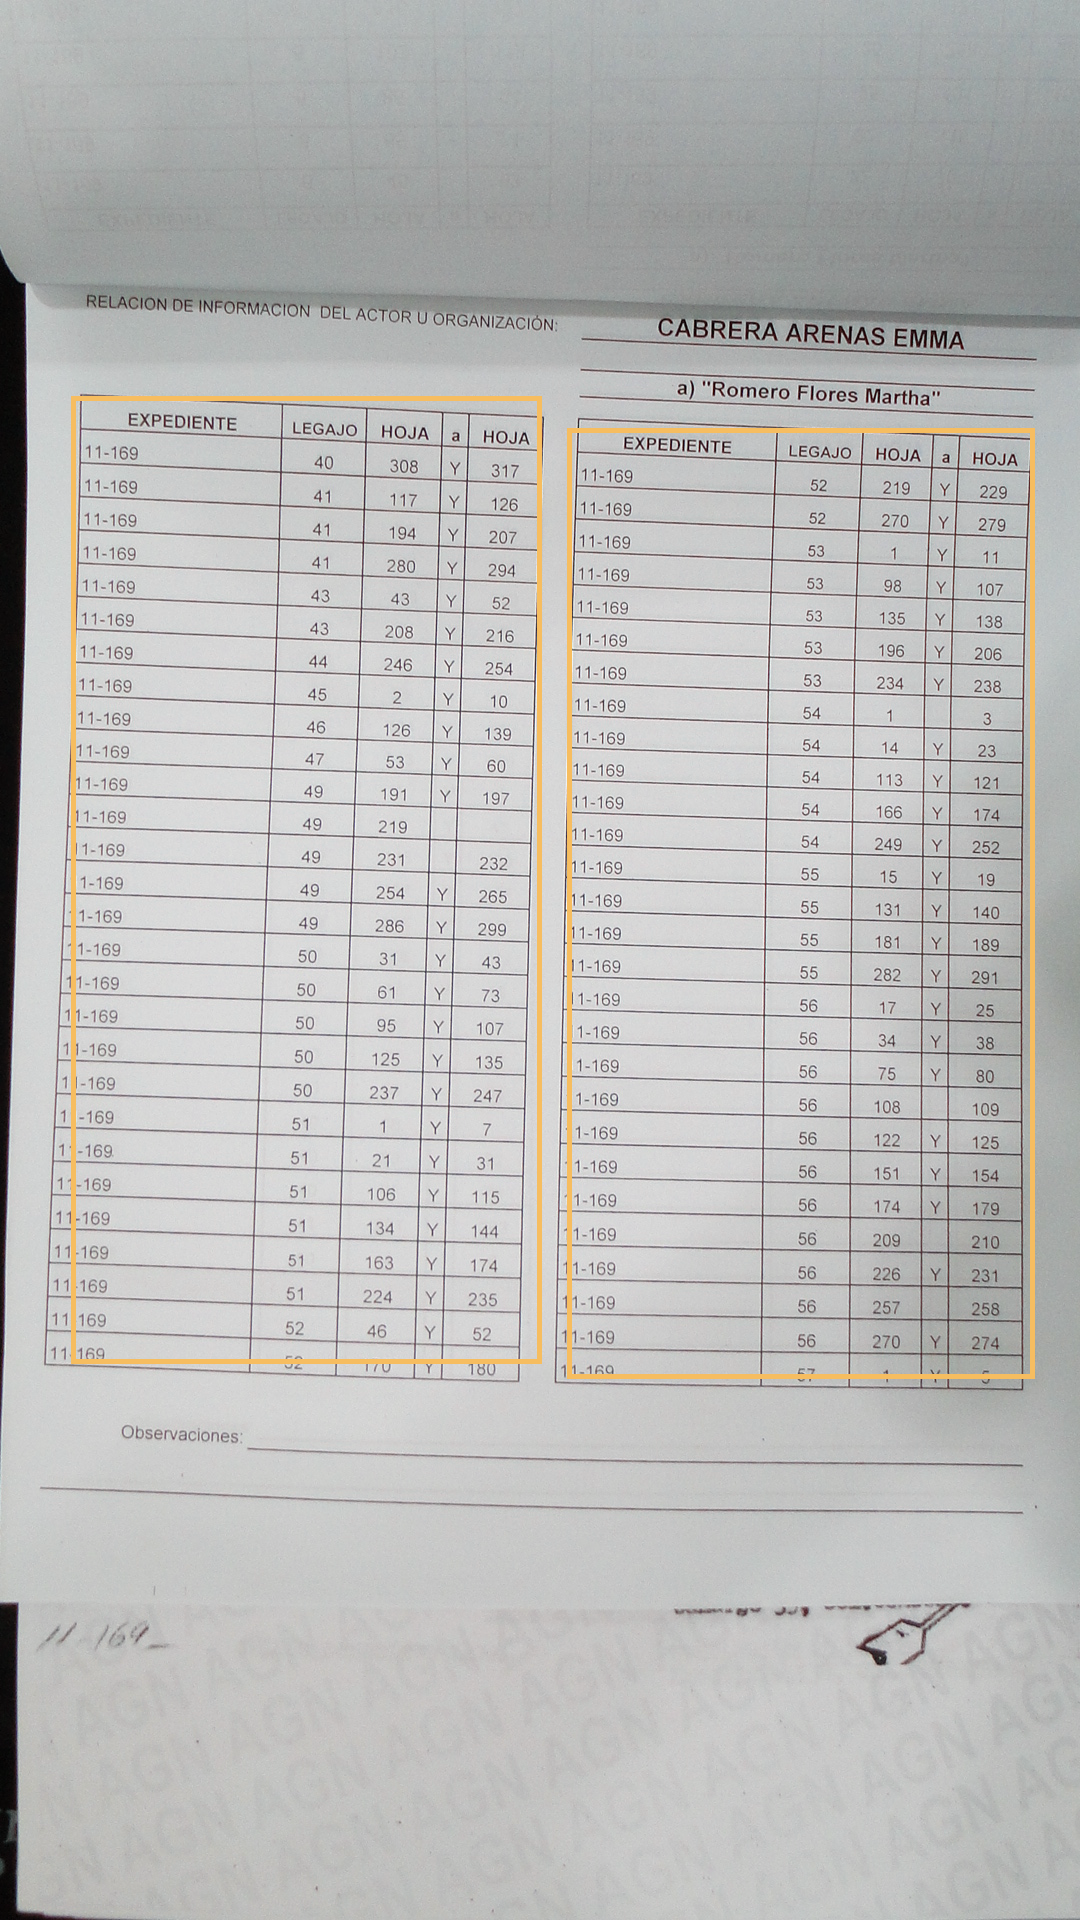

In [ ]:
lp.draw_box(imagen, layout)

In [ ]:
print(layout[0].block.x_1)

71.08798217773438


###Este es el CSV que se generó

In [ ]:
display(RETO1CSV)

filename  ...         ymax
0   AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-155...  ...   987.134460
1   AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-263...  ...   951.544739
2   AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-134...  ...  3242.770508
3   AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-329...  ...  3241.463867
4                 AGN_DFS_C.18_Cabrera_Ema_pg-002.jpg  ...  2390.951416
5                 AGN_DFS_C.18_Cabrera_Ema_pg-003.jpg  ...  2383.349121
6      AGN_DFS_C.189_Padilla_Rivera_Rebeca_pg-012.jpg  ...  3053.163330
7      AGN_DFS_C.189_Padilla_Rivera_Rebeca_pg-012.jpg  ...  3147.473633
8   AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-035.jpg  ...  2338.194824
9   AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-073.jpg  ...  2797.578613
10  AGN_DFS_AdeR_Declaracion_de_Alfredo_Tecla_Parr...  ...  1195.062256
11  AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Mar...  ...  2458.701172
12  AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Mar...  ...  2276.261475
13  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-001...  ...  1396.691040
14  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-001...  ...  1393.495239
15  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002...  ...  1363.855713
16  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002...  ...  1378.372070
17  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-003...  ...  1350.099365
18  AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-329...  ...  1013.575806

[19 rows x 8 columns]

###Guardamos el CSV

In [ ]:
RETO1CSV.to_csv("/content/drive/MyDrive/csvtables.csv",index=False)